In [1]:
%pylab inline
from scipy.fftpack import *
from scipy.io.wavfile import *

Populating the interactive namespace from numpy and matplotlib


#Análisis de Frecuencias
##Construción de Funciones

En esta seción se construyen las funciones sobre las cuales se basa todo el estudio de las frecuencias contenidas en los archivos de audio utilizados. Primero, se establacen las constantes que serán modificadas cada vez que las funciones se empleen sobre un archivo **.wav** distinto. Luego, se construyen como tal las funciones **leer()** y **fourier**, las cuales permiten obtener el arreglo de enteros de tipo int16 del archivo de audio y su frecuencia de muestreo, con **leer()**, y obtener la respectiva transformada de Fourier en el dominio de la Frecuencia de este arreglo y las frecuencias asociadas, con **fourier()**.

In [2]:
#Algunas constantes que serán modificadas por las funciones.
sampling = 0 #La frecuencia de muestreo del archivo de audio analizado. (Tipo= int)
dt = 0 #El diferencial de tiempo que define el menor salto de tiempo en el archivo. (Tipo = int)
N = 0 #La cantidad de datos en el archivo de audio. (Tipo = int)
t = []

In [3]:
#Nombre: Leer
#Parámetros: archivo- El nombre completo del archivo, junto con la extensión .wav.
#Parámetros: graficar- Booleano. De ser True, grafica los datos obtenidos del archivo importado.
#Este método importa un archivo escrito como .wav, para luego retornar un arreglo que contiene todos los datos
#contenidos en dicho archivo, la frecuencia de sampling del archivo .wav y el arreglo de duración temporal propio.
def leer(archivo):
    global sampling
    global t
    global N
    datosGeneral = read(archivo)
    original = datosGeneral[1]
    sampling = datosGeneral[0]
    N = len(original)
    t = linspace(0, N*(1/sampling), N)
    return array([original, sampling, t])

In [18]:
#Nombre: Fourier
#Parámetros: archivo- El nombre del archivo generado por la función Leer.
#Parámetros: graficar- Booleano que, de ser True, permite a la función graficar la transformada de Fourier realizada
#Este método recibe un archivo que contiene los datos de un .wav y retorna un arreglo de dos elementos:
#el primero es la transformada discreta de Fourier y el segundo son las frecuencias asociadas.
def fourier(archivo2):
    global sampling
    global dt
    global N
    transformada = fft(archivo2)
    dt = 1/sampling
    frecuencias = fftfreq(N,dt)
    final = array([frecuencias, abs(transformada)])
    return final

##Ejecución de Análisis
En esta sección se emplean las funciones definidas previamente para determinar las frecuencias fundamentales en el archivo de audio utilizado.
###Audio de Frecuencia Única
Para una prueba inicial, se utiliza un archivo de audio obtenido al grabar una guitarra tocando la nota LA, la cual tiene una frecuencia teórica de 440Hz.

Duración: 7.937 segundos


/Users/usuario/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


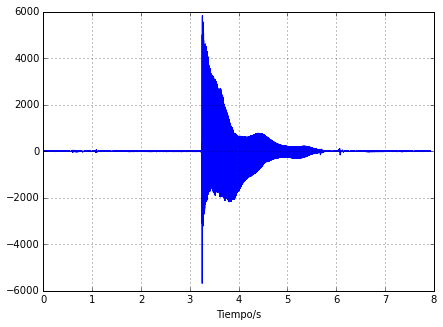

In [49]:
prueba1 = leer("A440.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba1[0] #El arreglo que define el archivo de audio.
tiempo = prueba1[2]

figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

A continuación, y contando ya con el arreglo de enteros de tipo int16 que define el archivo de audio, se procede a trasladarlos al dominio de la frecuencia, de manera que sea posible determinar la frecuencia fundamental que caracteriza el audio.

In [44]:
trans = fourier(arregloMusical)[1] #Los datos transformados por la función fourier()
freq = fourier(arregloMusical)[0] #Las frecuencias asociadas.

maximo = max(trans) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
for i in range(len(trans)):
    if(trans[i] == maximo):
        frecuencia = np.round(freq[i], 3)
        print("Frecuencia Fundamental: " + str(frecuencia) + " Hz")
        break

Frecuencia Fundamental: 370.568 Hz


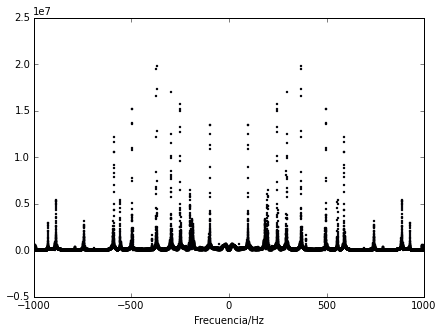

In [47]:
#Se presentan los resultados gráficos en el dominio de la frecuencia para visualizar la fundamental.
figure(figsize=(7,5))
scatter(freq, trans, s = 2)
xlim(-1000,1000)
xlabel("Frecuencia/Hz")

###Audio de Dos Notas
Para continuar con la prueba del sistema de análisis de audio construido, se utilizará ahora un archivo de audio obtenido de grabar una guitarra tocando primero las notas G y B juntas, para después de 2 segundos tocar D y F juntas.

Duración: 10.36 segundos


/Users/usuario/anaconda/lib/python3.4/site-packages/scipy/io/wavfile.py:172: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


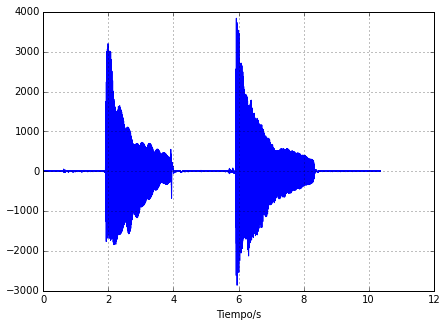

In [42]:
prueba1 = leer("G&BthenD&F.wav") #Obtener la información del archivo de audio.
arregloMusical = prueba1[0] #El arreglo que define el archivo de audio.
tiempo = prueba1[2]
figure(figsize=(7,5))
plot(tiempo,arregloMusical) #Visualizar el arreglo del archivo de audio.
#Las siguientes líneas corresponden a la configuración estética de la gráfica.
xlabel("Tiempo/s")
grid(True)
duracion = np.round(N*(1/sampling), 3)
print("Duración: " + str(duracion) + " segundos")

Para realizar un análisis correcto de este archivo de audio utilizando la transformada de Fourier, es necesario dividir el arreglo que define este audio en 2 arreglos, cada uno conteniendo los pulsos que se observan en la figura anterior. De esta forma será posible determinar las dos frecuencias fundamentales que definen las notas que deben tocarse en cada pulso. Para hacer esta división, se tiene en cuenta que hubo una separación temporal de 2 segundos entre cada pulso de 2 notas, por lo que se toma el número de datos N y se construyen dos arreglos; uno que vaya del dato inicial hasta el de la mitad, y otro que vaya de ese hasta el último.

####Primer Pulso

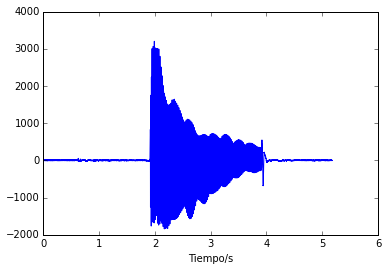

In [13]:
group1 = arregloMusical[0:N/2]
time1 = tiempo[0:N/2]
plot(time1, group1)
xlabel("Tiempo/s")

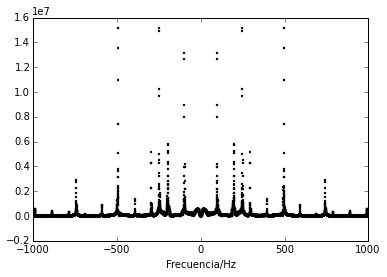

In [23]:
N = len(group1) #Actualizar el valor de N después de dividir los arreglos.
trans1 = fourier(group1)[1]#Los datos transformados por la función fourier()
freq1 = fourier(group1)[0] #Las frecuencias asociadas.

maximo = max(trans) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
frecuencias = []
#Hallar primer máximo
for i in range(len(trans1)):
    if(trans1[i] == maximo):
        frecuencias.append(abs(freq1[i]))
        break

scatter(freq1, trans1, s = 2)
xlim(-1000,1000)
xlabel("Frecuencia/Hz")

Ya que en este caso se busca hallar 2 frecuencias fundamentales, se utilizará primero el arreglo en el dominio de la frecuencia obtenido para determinar la primera frecuencia fundamental. Luego, se creará un nuevo arreglo donde se eliminen los máximos que definían esa frecuencia, de manera que los nuevos máximos sean los de la segunda frecuencia fundamental.

In [24]:
#Para hallar la primera frecuencia fundamental, simplemente se busca la frecuencia asociada al máximo del
#arreglo de datos transformados. Se utiliza el break para hacer más eficiente el proceso.
frecuencia = []
maximo = max(trans)
for i in range(len(trans)):
    if(trans[i] == maximo):
        frecuencia.append(freq[i])
        break

In [25]:
#Se crea un nuevo arreglo que ya no contenga los datos máximos asociados a la frecuencia fndamental ya hallada,
#de manera que el nuevo máximo esté asociado a la segunda drecuencia fundamental.
lim = 1.3*10**7 #Límite de corte
nuevoArreglo2 = []
newFreq2 = []
for i in range(len(trans)):
    if(trans[i] < lim):
        nuevoArreglo2.append(trans[i])
        newFreq2.append(freq[i])

In [26]:
#Similar a como se halló la primera frecuencia fundamental, se halla la segunda asociando una frecuencia a el máximo
#del arreglo de datos transformados. Esta y la anterior se guardan en el arreglo frecuencia.
maximo2 = max(nuevoArreglo2)
for i in range(len(nuevoArreglo2)):
    if(nuevoArreglo2[i] == maximo2):
        frecuencia.append(newFreq2[i])
        break

In [39]:
frecuencia1 = np.round(frecuencia[0],3) #Presentación aproximada de frecuencias obtenidas a 3 decimales.
frecuencia2 = np.round(frecuencia[1],3)
print("Las frecuencias fundamentales son: " + str(frecuencia1) + " Hz y " + str(frecuencia2) + " Hz")

Las frecuencias fundamentales son: 248.075 Hz y 48.939 Hz


####Segundo Pulso

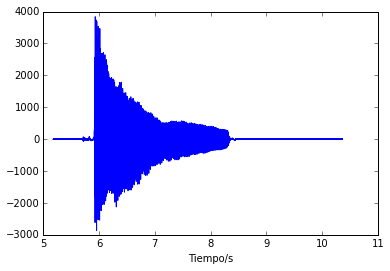

In [29]:
group2 = arregloMusical[N:-1]
time2 = tiempo[N:-1]
plot(time2, group2)
xlabel("Tiempo/s")

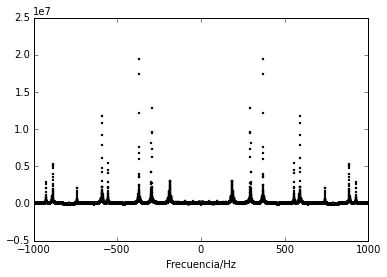

In [36]:
N = len(group2) #Actualizar N según el nueo arreglo.
trans2 = fourier(group2)[1] #Los datos transformados por la función fourier()
freq2 = fourier(group2)[0] #Las frecuencias asociadas.

maximoB = max(trans2) #El máximo valor de las transformadas.
#Se necesita este valor pues será la frecuencia fundamental la que tendrá asociado este valor, por lo que es un
#estimador para hallarla.

#Este procedimiento permite buscar la frecuencia que tiene asociado el valor máximo de los valores
#transformados. Se utiliza el comando break debido a que el archivo puede llegar a tener una extensión que
#demore mucho el ciclo, por lo que se busca terminarlo apenas se determine la frecuencia fundamental.
#Hallar primer máximo
for i in range(len(trans2)):
    if(trans2[i] == maximoB):
        frecuencias.append(abs(freq2[i]))
        break

scatter(freq2, trans2, s = 2)
xlim(-1000,1000)
xlabel("Frecuencia/Hz")

In [32]:
#Para hallar la primera frecuencia fundamental, simplemente se busca la frecuencia asociada al máximo del
#arreglo de datos transformados. Se utiliza el break para hacer más eficiente el proceso.
frecuencias = []
maximoQ = max(trans2)
for i in range(len(trans2)):
    if(trans2[i] == maximoQ):
        frecuencias.append(freq2[i])
        break

In [33]:
lim = 1.5*10**7 #Límite de corte
nuevoArreglo2 = []
newFreq2 = []
for i in range(len(trans2)):
    if(trans2[i] < lim):
        nuevoArreglo2.append(trans2[i])
        newFreq2.append(freq2[i])

In [34]:
maximo2 = max(nuevoArreglo2)
for i in range(len(nuevoArreglo2)):
    if(nuevoArreglo2[i] == maximo2):
        frecuencias.append(newFreq2[i])
        break

In [41]:
frecuencia1 = np.round(frecuencias[0],3) #Presentación aproximada de las frecuencias obtenidas a 3 decimales.
frecuencia2 = np.round(frecuencias[1],3)
print("Las frecuencias fundamentales son: " + str(frecuencia1) + "Hz y " + str(frecuencia2) + " Hz")

Las frecuencias fundamentales son: 370.666Hz y 295.568 Hz
